# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

<img src="Screenshot 2025-10-06 at 6.33.01 PM.png">
<img src="Screenshot 2025-10-06 at 6.33.14 PM.png">
<img src="/Users/codyliddle/linear_models_assignment/Screenshot 2025-10-06 at 6.33.30 PM.png">
<img src="/Users/codyliddle/linear_models_assignment/Screenshot 2025-10-06 at 6.33.39 PM.png">

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [1]:
import pandas as pd

df = pd.read_csv("./data/heart_hw.csv")

control_survival = df[df['transplant'] == 'control']['y'].mean()

treatment_survival = df[df['transplant'] == 'treatment']['y'].mean()

#average treatment effect
ate = treatment_survival - control_survival

print(f"(a) Control survival rate: {control_survival:.3f}")
print(f"(b) ATE: {ate:.3f}")

(a) Control survival rate: 0.118
(b) ATE: 0.230


In [2]:
%pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import statsmodels.api as sm

df['treatment_dummy'] = (df['transplant'] == 'treatment').astype(int)

X = sm.add_constant(df['treatment_dummy'])
model = sm.OLS(df['y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Mon, 06 Oct 2025   Prob (F-statistic):             0.0133
Time:                        18:30:30   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1176      0.075     

The intercept of the regression is the estimated survival rate in the control group, which matches the answer from 1a (about 1.118) because that represents when treatment is = 0, which is what the control represents. The treatment coefficient is the difference in survival between treatment and control which matches the ATE from question one as both are .23.

In [4]:
X2 = sm.add_constant(df[['treatment_dummy', 'age']])
model2 = sm.OLS(df['y'], X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.602
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           0.000357
Time:                        18:30:30   Log-Likelihood:                -54.558
No. Observations:                 103   AIC:                             115.1
Df Residuals:                     100   BIC:                             123.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7020      0.196     

The intercept now reflects the expected survival for someone in the control group with age = 0. Adding age to the model changes the interpretation of the intercept, but it provides a better estimate of the treatment effect by controlling for a confounding variable. It reveals that age is negatively associated with survival, and it suggests that the raw ATE underestimated the treatment's benefit because it didn’t adjust for age differences between groups.

Test Accuracy: 0.677
Test AUC: 0.890


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


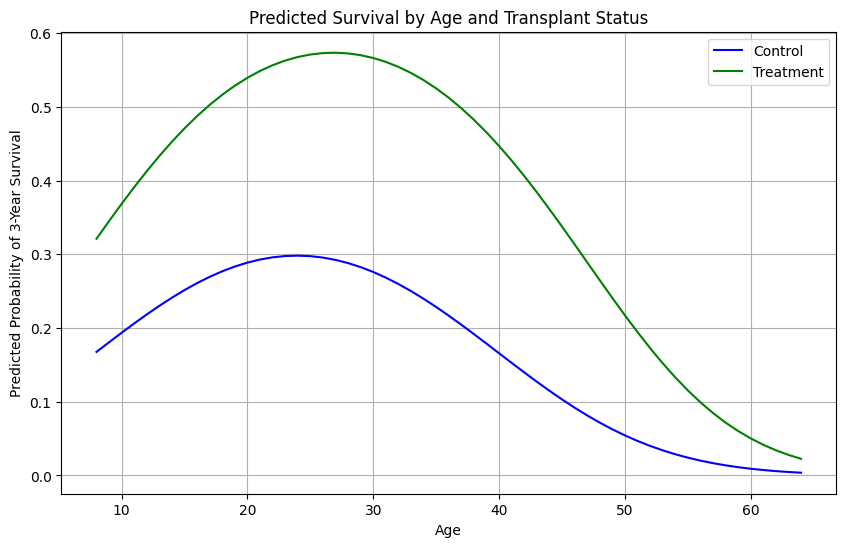

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

df['treatment_dummy'] = (df['transplant'] == 'treatment').astype(int)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['age', 'treatment_dummy']])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)
y_pred_prob = logit.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test AUC: {test_auc:.3f}")

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

ages = np.arange(df['age'].min(), df['age'].max()+1)
treatment_0 = np.column_stack([ages, np.zeros_like(ages)])
treatment_1 = np.column_stack([ages, np.ones_like(ages)])

X_plot_0 = poly.transform(treatment_0)
X_plot_1 = poly.transform(treatment_1)

probs_0 = logit_model.predict_proba(X_plot_0)[:, 1]
probs_1 = logit_model.predict_proba(X_plot_1)[:, 1]

plt.figure(figsize=(10,6))
plt.plot(ages, probs_0, label='Control', color='blue')
plt.plot(ages, probs_1, label='Treatment', color='green')
plt.xlabel("Age")
plt.ylabel("Predicted Probability of 3-Year Survival")
plt.title("Predicted Survival by Age and Transplant Status")
plt.legend()
plt.grid(True)
plt.show()

This model, while fairly simple, shows that treatment improves survival rates until around age 30ish, and then begins to become less effective as age increases, with the gap between control and treatment shrinking substantially with overall three year survival rates.

This model may pose several moral and ethical questions, as there may be inherent biases against certain groups. In this case, the model directly shows lower success rates for older patients, which could result in them recieving less treatment opportunities strictly on the basis of age rather any other potential factors affecting treatment success that the model does not consider. Model drift could be a concern too, as if new data emerges and shows changes in trends and treatment effectiveness that potentially says something like treatment is more effective for older patients, this model would not reflect that. There also is the question of medical treatment being a patient to patient ordeal, and it would be incredibly upsetting to hear you or a loved one could not recieve treatment because something like an algorithm, who views you as nothing but a data point, says so.